In [9]:
from math import sin, pi
from fem.system import solve_system

import numpy as np

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Define the Problem

In [2]:
N = 4

def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [0, 0], 0)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y))   

### Solve the system

In [3]:
results = solve_system(parameters, known_nodes, f, 4, exact)

In [7]:
results['err']

0.08173170244865868

### Plot Results

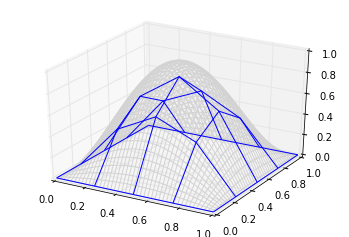

In [10]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

# Plot our approximation
xs, ys = results['grid']
U = results['U']
ax.plot_wireframe(xs, ys, U, color='blue')

### Now for multpie resolutions

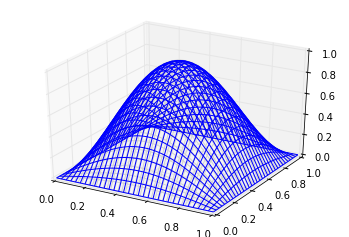

In [13]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 32:
        # Plot our approximation
        xs, ys = results['grid']
        U = results['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err.append(results['err'])

In [14]:
err

[0.08173170244865868,
 0.04941190286617995,
 0.02768196135826939,
 0.014692380942732296]